<a href="https://colab.research.google.com/github/SindhumathiE/Data-Science-Projects/blob/main/Instagram_influencers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt


Importing the Dataset

In [ ]:
data = pd.read_csv("Influencer.csv")

In [ ]:
data.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [ ]:
data.shape

(200, 10)

Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [ ]:
data.columns

Index(['Rank', 'Channel Info', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region'],
      dtype='object')

In [ ]:
data.rename(columns={"Rank": "rank"},inplace=True)
data.rename(columns={"Channel Info": "channel_info"},inplace=True)
data.rename(columns={"Influence Score": "influence_score"},inplace=True)
data.rename(columns={"Avg. Likes": "avg_likes"},inplace=True)
data.rename(columns={"60-Day Eng Rate": "60dayeng_rate"},inplace=True)
data.rename(columns={"60-Day Eng Rate": "60dayeng_rate"},inplace=True)
data.rename(columns={"New Post Avg. Likes": "newpostavg_like"},inplace=True)
data.rename(columns={"Total Likes": "total_likes"},inplace=True)
data.rename(columns={"Country Or Region": "Country"},inplace=True)

In [ ]:
data.isnull().sum()

rank                0
channel_info        0
influence_score     0
Followers           0
avg_likes           0
Posts               0
60dayeng_rate       0
newpostavg_like     0
total_likes         0
Country            63
dtype: int64

In [ ]:
data["Country"].fillna("Other",inplace=True)

In [ ]:
data.isnull().sum()

rank               0
channel_info       0
influence_score    0
Followers          0
avg_likes          0
Posts              0
60dayeng_rate      0
newpostavg_like    0
total_likes        0
Country            0
dtype: int64

In [ ]:
data.describe()

,rank,influence_score,60dayeng_rate
count,200.000000,200.000000,200.000000
mean,100.500000,81.850000,0.019160
std,57.879185,8.875323,0.032577
min,1.000000,22.000000,0.000000
25%,50.750000,80.000000,0.004000
50%,100.500000,84.000000,0.009500
75%,150.250000,86.000000,0.017250
max,200.000000,93.000000,0.250000


EDA - Exploratory data Analysis

In [ ]:
data["rank"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
data["channel_info"]=data["channel_info"].astype("str")
data["channel_info"]=data["channel_info"].apply(lambda x: x.strip("\n"))
data["channel_info"]=data["channel_info"].apply(lambda x: x.capitalize())
data.head()

,rank,channel_info,influence_score,Followers,avg_likes,Posts,60dayeng_rate,newpostavg_like,total_likes,Country
0,1,Cristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,Kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,Leomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,Other
3,4,Selenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,Therock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [ ]:
insta_influencers=data.copy()

In [ ]:
millon_follower=data[data["Followers"].apply(lambda x: x[-1]=="m")]
k_follower=data[data["Followers"].apply(lambda x: x[-1]=="k")]
num_follower=data[data["Followers"].apply(lambda x: x[-1] in "0123456789")]

In [ ]:
def billon(x):
    a=x.strip("b")
    b=pd.to_numeric(a)
    b=b*1000000000
    return b

def millons(x):
    a=x.strip("m")
    b=pd.to_numeric(a)
    b=b*1000000
    return b

def k(x):
    a=x.strip("k")
    b=pd.to_numeric(a)
    b=b*1000
    return b



In [ ]:
millon_follower["Followers"]=millon_follower["Followers"].apply(millons)
k_follower["Followers"]=k_follower["Followers"].apply(k)
data= pd.concat([millon_follower,k_follower,num_follower],axis=0)
data.head()

,rank,channel_info,influence_score,Followers,avg_likes,Posts,60dayeng_rate,newpostavg_like,total_likes,Country
0,1,Cristiano,92,485200000.0,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,Kyliejenner,91,370700000.0,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,Leomessi,90,363900000.0,6.7m,915,0.010,3.5m,6.1b,Other
3,4,Selenagomez,93,348800000.0,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,Therock,91,339400000.0,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [ ]:
millon_follower=data[data["avg_likes"].apply(lambda x: x[-1]=="m")]
k_follower=data[data["avg_likes"].apply(lambda x: x[-1]=="k")]
num_follower=data[data["avg_likes"].apply(lambda x: x[-1] in "0123456789")]

In [ ]:
millon_follower["avg_likes"]=millon_follower["avg_likes"].apply(millons)
k_follower["avg_likes"]=k_follower["avg_likes"].apply(k)
data= pd.concat([millon_follower,k_follower,num_follower],axis=0)
data.head()

,rank,channel_info,influence_score,Followers,avg_likes,Posts,60dayeng_rate,newpostavg_like,total_likes,Country
0,1,Cristiano,92,485200000.0,8700000.0,3.4k,0.013,6.3m,29.1b,Spain
1,2,Kyliejenner,91,370700000.0,8200000.0,7.0k,0.014,5.0m,57.4b,United States
2,3,Leomessi,90,363900000.0,6700000.0,915,0.010,3.5m,6.1b,Other
3,4,Selenagomez,93,348800000.0,6100000.0,1.9k,0.005,1.7m,11.4b,United States
4,5,Therock,91,339400000.0,1800000.0,6.8k,0.003,932.0k,12.6b,United States


In [ ]:
data["Posts"]=data["Posts"].astype("str")
millon_follower=data[data["Posts"].apply(lambda x: x[-1]=="m")]
k_follower=data[data["Posts"].apply(lambda x: x[-1]=="k")]
num_follower=data[data["Posts"].apply(lambda x: x[-1] in "0123456789")]

In [ ]:
millon_follower["Posts"]=millon_follower["Posts"].apply(millons)
k_follower["Posts"]=k_follower["Posts"].apply(k)
data= pd.concat([millon_follower,k_follower,num_follower],axis=0)
data

,rank,channel_info,influence_score,Followers,avg_likes,Posts,60dayeng_rate,newpostavg_like,total_likes,Country
0,1,Cristiano,92,485200000.0,8700000.0,3400.0,0.013,6.3m,29.1b,Spain
1,2,Kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5.0m,57.4b,United States
3,4,Selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1.7m,11.4b,United States
4,5,Therock,91,339400000.0,1800000.0,6800.0,0.003,932.0k,12.6b,United States
5,6,Arianagrande,92,333000000.0,3700000.0,5000.0,0.009,3.1m,18.5b,United States
...,...,...,...,...,...,...,...,...,...,...
171,172,Eminem,84,36600000.0,988400.0,691,0.011,382.5k,683.0m,United States
174,175,Nattinatasha,47,36100000.0,513200.0,59,0.006,201.6k,30.3m,Czech Republic
181,182,Toni.krs,83,35600000.0,597800.0,946,0.012,432.5k,565.5m,Other
189,190,Adidasoriginals,83,34100000.0,136200.0,180,0.002,66.8k,24.5m,Other


In [ ]:
data["newpostavg_like"]=data["newpostavg_like"].astype("str")
millon_follower=data[data["newpostavg_like"].apply(lambda x: x[-1]=="m")]
k_follower=data[data["newpostavg_like"].apply(lambda x: x[-1]=="k")]
num_follower=data[data["newpostavg_like"].apply(lambda x: x[-1] in "0123456789")]

In [ ]:
millon_follower["newpostavg_like"]=millon_follower["newpostavg_like"].apply(millons)
k_follower["newpostavg_like"]=k_follower["newpostavg_like"].apply(k)
data= pd.concat([millon_follower,k_follower,num_follower],axis=0)
data

,rank,channel_info,influence_score,Followers,avg_likes,Posts,60dayeng_rate,newpostavg_like,total_likes,Country
0,1,Cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,29.1b,Spain
1,2,Kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,57.4b,United States
3,4,Selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,11.4b,United States
5,6,Arianagrande,92,333000000.0,3700000.0,5000.0,0.009,3100000.0,18.5b,United States
6,7,Kimkardashian,91,330700000.0,3500000.0,5700.0,0.005,1700000.0,19.8b,United States
...,...,...,...,...,...,...,...,...,...,...
174,175,Nattinatasha,47,36100000.0,513200.0,59,0.006,201600.0,30.3m,Czech Republic
181,182,Toni.krs,83,35600000.0,597800.0,946,0.012,432500.0,565.5m,Other
189,190,Adidasoriginals,83,34100000.0,136200.0,180,0.002,66800.0,24.5m,Other
198,199,Luansantana,79,33500000.0,193300.0,865,0.003,82600.0,167.2m,Brazil


In [ ]:
data["total_likes"]=data["total_likes"].astype("str")
billon_follower=data[data["total_likes"].apply(lambda x: x[-1]=="b")]
millon_follower=data[data["total_likes"].apply(lambda x: x[-1]=="m")]
k_follower=data[data["total_likes"].apply(lambda x: x[-1]=="k")]
num_follower=data[data["total_likes"].apply(lambda x: x[-1] in "0123456789")]

In [ ]:
millon_follower["total_likes"]=millon_follower["total_likes"].apply(millons)
billon_follower["total_likes"]=billon_follower["total_likes"].apply(billon)
k_follower["total_likes"]=k_follower["total_likes"].apply(k)
data= pd.concat([billon_follower,millon_follower,k_follower,num_follower],axis=0)
data

,rank,channel_info,influence_score,Followers,avg_likes,Posts,60dayeng_rate,newpostavg_like,total_likes,Country
0,1,Cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,Kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
3,4,Selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
5,6,Arianagrande,92,333000000.0,3700000.0,5000.0,0.009,3100000.0,1.850000e+10,United States
6,7,Kimkardashian,91,330700000.0,3500000.0,5700.0,0.005,1700000.0,1.980000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
174,175,Nattinatasha,47,36100000.0,513200.0,59,0.006,201600.0,3.030000e+07,Czech Republic
181,182,Toni.krs,83,35600000.0,597800.0,946,0.012,432500.0,5.655000e+08,Other
189,190,Adidasoriginals,83,34100000.0,136200.0,180,0.002,66800.0,2.450000e+07,Other
198,199,Luansantana,79,33500000.0,193300.0,865,0.003,82600.0,1.672000e+08,Brazil


In [ ]:
data["60dayeng_rate"]=data["60dayeng_rate"].apply(lambda x:x*100)

In [ ]:
data.head()

,rank,channel_info,influence_score,Followers,avg_likes,Posts,60dayeng_rate,newpostavg_like,total_likes,Country
0,1,Cristiano,92,485200000.0,8700000.0,3400.0,1.3,6300000.0,2.910000e+10,Spain
1,2,Kyliejenner,91,370700000.0,8200000.0,7000.0,1.4,5000000.0,5.740000e+10,United States
3,4,Selenagomez,93,348800000.0,6100000.0,1900.0,0.5,1700000.0,1.140000e+10,United States
5,6,Arianagrande,92,333000000.0,3700000.0,5000.0,0.9,3100000.0,1.850000e+10,United States
6,7,Kimkardashian,91,330700000.0,3500000.0,5700.0,0.5,1700000.0,1.980000e+10,United States


1. Are there any correlated features in the given dataset? If yes, state the correlation
coefficient of the pair of features which are highly correlated. 

In [ ]:
#rank vs influence score
from scipy.stats import pearsonr
x=data["rank"]
y=data["influence_score"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [ ]:
#rank vs followers
x=data["rank"]
y=data["Followers"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [ ]:
#rank vs average likes
x=data["rank"]
y=data["avg_likes"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [ ]:
#rank vs posts
x=data["rank"]
y=data["Posts"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [ ]:
#rank vs enangement rate
x=data["rank"]
y=data["60dayeng_rate"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [ ]:
#rank vs Total likes
x=data["rank"]
y=data["total_likes"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [ ]:
#rank vs New post
x=data["rank"]
y=data["newpostavg_like"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [ ]:
import scipy.stats as s
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('rank ~ C(Country)',data=insta_influencers).fit()

result = sm.stats.anova_lm(model, type=3)

results=result["PR(>F)"][0]

if results<0.05:
    print("Independent feature")
else:
    print("Dependent feature")


Independent feature


All necessary features are correlated and channel_info is not necessary for correlation....

2. What is the frequency distribution of the following features?

    ○ Followers
    ○ Posts
    ○ Influence Score
    
    

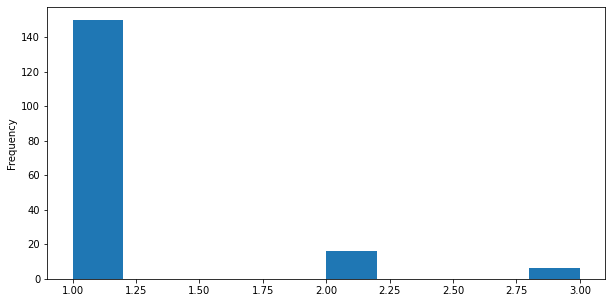

In [ ]:
plt.figure(figsize=(10,5))
insta_influencers.groupby("Followers").size().plot(kind="hist")

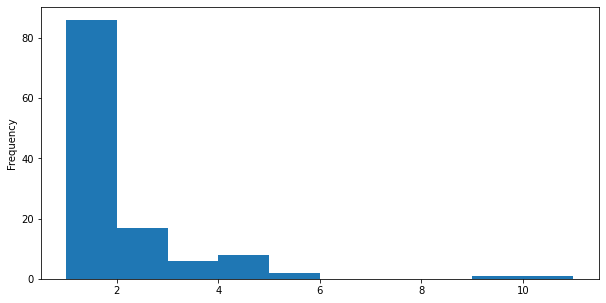

In [ ]:
plt.figure(figsize=(10,5))
insta_influencers.groupby("Posts").size().plot(kind="hist")

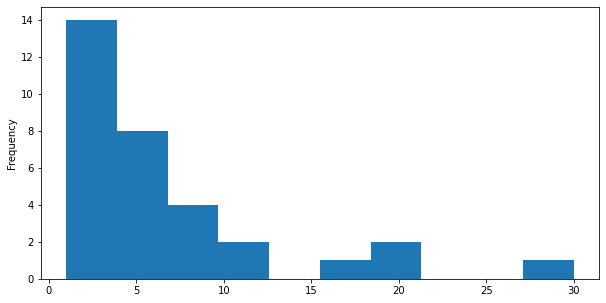

In [ ]:
plt.figure(figsize=(10,5))
insta_influencers.groupby("influence_score").size().plot(kind="hist")

3. Which country houses the highest number of Instagram Influencers? Please show the
count of Instagram influencers in different countries using barchart.

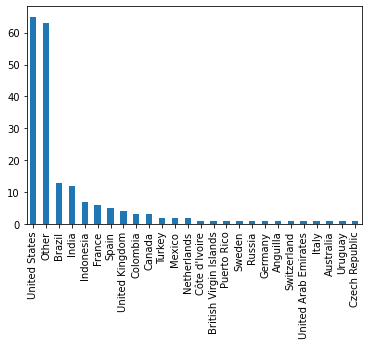

In [ ]:
country=data["Country"].value_counts()
country.plot(kind="bar")

4. Who are the top 10 influencers in the given dataset based on the following features

    ● Followers
    ● Average likes
    ● Total Likes

In [ ]:
country.head(10)


United States     65
Other             63
Brazil            13
India             12
Indonesia          7
France             6
Spain              5
United Kingdom     4
Colombia           3
Canada             3
Name: Country, dtype: int64

In [ ]:
data.sort_values(["Followers","avg_likes","total_likes"],ascending=False)["channel_info"].head(10)

0          Cristiano
1        Kyliejenner
2           Leomessi
3        Selenagomez
4            Therock
5       Arianagrande
6      Kimkardashian
7            Beyonce
8    Khloekardashian
9       Justinbieber
Name: channel_info, dtype: object

5. Describe the relationship between the following pairs of features using a suitable graph

    ● Followers and Total Likes
    ● Followers and Influence Score

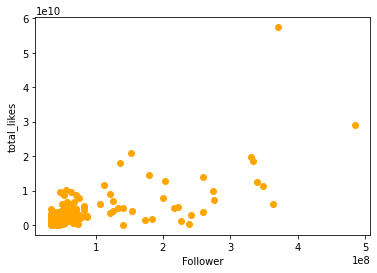

In [ ]:
x=data["Followers"]
y=data["total_likes"]
plt.scatter(x,y,c="orange")
plt.xlabel("Follower")
plt.ylabel("total_likes")
plt.show()



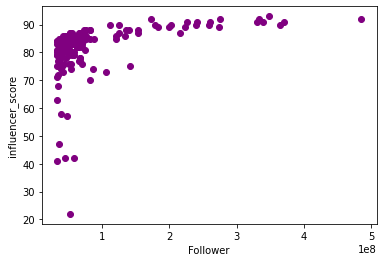

In [ ]:
x=data["Followers"]
y=data["influence_score"]
plt.scatter(x,y,c="purple")
plt.xlabel("Follower")
plt.ylabel("influencer_score")
plt.show()

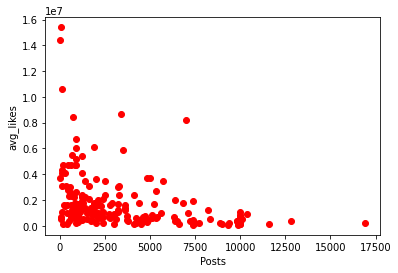

In [ ]:
x=data["Posts"]
y=data["avg_likes"]
plt.scatter(x,y,c="red")
plt.xlabel("Posts")
plt.ylabel("avg_likes")
plt.show()

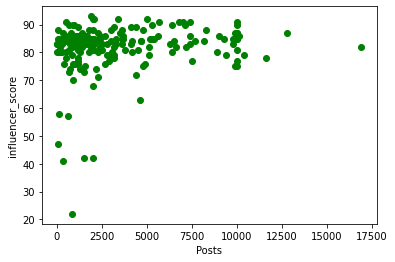

In [ ]:
x=data["Posts"]
y=data["influence_score"]
plt.scatter(x,y,c='green')
plt.xlabel("Posts")
plt.ylabel("influencer_score")
plt.show()

Summary :
1. From the above data on Instagram Influencers, we can visualize that the users are more from US and followed by other countries.
2. The prediction on rank is based on the content provided by the followers.